## ZSL lab 1 ##
nguyet79@fel.cvut.cz


In [19]:
import scipy.stats as stats
from scipy.stats import t, ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

## first part

What are the dimensions of the image matrix?

What is the brightness value that represents the image background?

What is the average brightness value of the brain and the skull in the image? (Try using histogram of the image.)

Using simple thresholding of the brightness values

1) produce an image that is a binary mask of the skull in the image.

2) produce an image that is a binary mask of the brain in the image. Is it possible to select the brain only by thresholding the brightness?



# 1. load image


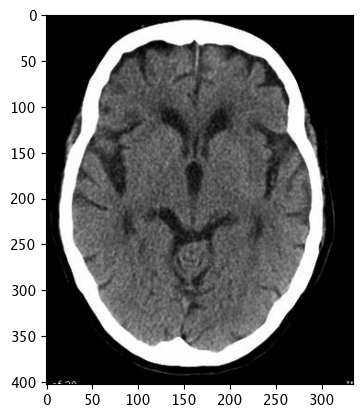

In [20]:
img = cv2.imread('ct_brain.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('on')
plt.show()

## Create histogram of the image and find average brightness value of the brain. 

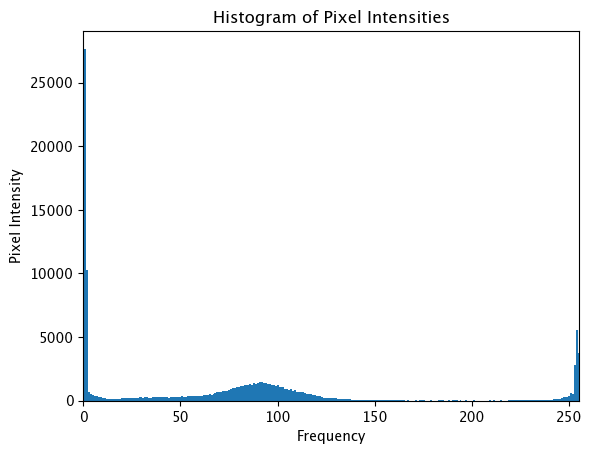

In [21]:
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

plt.bar(bins[:-1], hist, width=1)
plt.title('Histogram of Pixel Intensities')
plt.ylabel('Pixel Intensity')
plt.xlabel('Frequency')
plt.xlim([0, 255])
plt.show()

## Using simple thresholding of the brightness values

1) produce an image that is a binary mask of the skull in the image.

2) produce an image that is a binary mask of the brain in the image. Is it possible to select the brain only by thresholding the brightness?

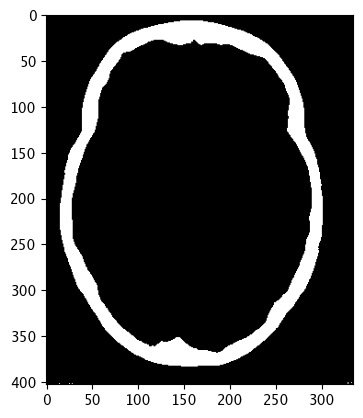

In [22]:
mask_skull = img > 200
plt.imshow(mask_skull, cmap='gray')

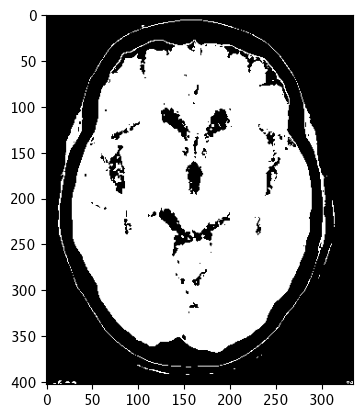

In [23]:
brain_mask = (img > 40) & (img < 210)
plt.imshow(brain_mask, cmap='gray')

## Homework 1
Try to improve the binary mask for brain by smoothing the image by Gaussian filter. 


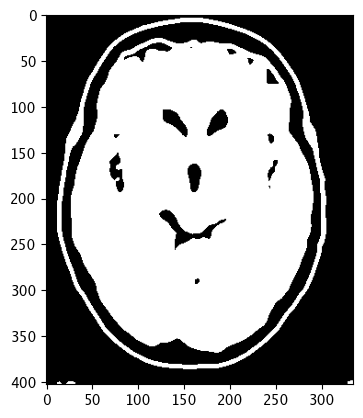

In [24]:
# smooth the image using a Gaussian filter
img_smooth = cv2.GaussianBlur(img, (9, 9), 3)
plt.imshow(img_smooth, cmap='gray')

brain_mask_smooth = (img_smooth > 40) & (img_smooth < 210)
plt.imshow(brain_mask_smooth, cmap='gray')

## Homework 2 
Implement a simpler variant of the two sample Student's t test as a function

In [36]:
# implement my own two sample ttest

def my_two_sample_ttest(sample1, sample2, alpha, adjusted_alpha = False, num_of_comparisons = 0):
    if adjusted_alpha:
        alpha = alpha / num_of_comparisons  
    decision = 0
    
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    sd1 = np.std(sample1, ddof=1)
    sd2 = np.std(sample2, ddof=1)
    sd_pooled = np.sqrt(((len(sample1) - 1) * sd1**2 + (len(sample2) - 1) * sd2**2) / (len(sample1) + len(sample2) - 2))
    t_statistic = (mean1 - mean2) / (sd_pooled * np.sqrt(1/len(sample1) + 1/len(sample2)))
    
    p_val = (1 - t.cdf(abs(t_statistic), df=len(sample1) + len(sample2) - 2)) * 2
    
    if p_val < alpha:
        decision = 1    
        
    return t_statistic, p_val
   


In [49]:
# test my ttest function

for i in range(10):
    
    sample1 = np.random.normal(0.1, 1, 100)
    sample2 = np.random.normal(0.1, 1, 100)
    
    t_statistics, p_val = my_two_sample_ttest(sample1, sample2, alpha=0.05)

    # compare with scipy's ttest_ind
    t_statistic_scipy, p_val_scipy = stats.ttest_ind(sample1, sample2, equal_var=True)
    print(f"my t-test: {t_statistics:.3f}, my p-value: {p_val:.3f},\n reference t-test: {t_statistic_scipy:.3f}, reference p-value: {p_val_scipy:.3f}")

my t-test: 0.472, my p-value: 0.637,
 reference t-test: 0.472, reference p-value: 0.637
my t-test: 1.160, my p-value: 0.247,
 reference t-test: 1.160, reference p-value: 0.247
my t-test: -0.348, my p-value: 0.728,
 reference t-test: -0.348, reference p-value: 0.728
my t-test: -0.411, my p-value: 0.682,
 reference t-test: -0.411, reference p-value: 0.682
my t-test: -0.593, my p-value: 0.554,
 reference t-test: -0.593, reference p-value: 0.554
my t-test: -1.390, my p-value: 0.166,
 reference t-test: -1.390, reference p-value: 0.166
my t-test: -0.578, my p-value: 0.564,
 reference t-test: -0.578, reference p-value: 0.564
my t-test: 0.949, my p-value: 0.344,
 reference t-test: 0.949, reference p-value: 0.344
my t-test: 0.739, my p-value: 0.461,
 reference t-test: 0.739, reference p-value: 0.461
my t-test: 1.309, my p-value: 0.192,
 reference t-test: 1.309, reference p-value: 0.192


## Homework 3
Use data multidata.mat to examine the problem of multiple comparison with Student's t test.

The data contain three columns, first column indicates experimental condition (integers 1 to 5), the second and third columns contain certain measurement. The data could originate from an experiment where a test subject was viewing images with certain contents (1 - neutral, 2 - adventure, …) while the size of his/her pupil was measured by eye tracking device and his/her skin conductance by polygraph (the variables). In an evaluation of the experiment, we want to know whether the variables are different for certain experimental condition.

Use Student's t test to compare each condition against each other separately for both variables (var1| cond1 vs var1 | cond2, var1| cond1 vs var1 | cond3, var1| cond1 vs var1 | cond4, …, var1| cond2 vs var1 | cond3, var1| cond2 vs var1 | cond4, …, similar to the boxplots bellow). Compute the number of comparison performed in the evaluation of the experiment and choose such an adjusted significance threshold using Bonferroni correction so that the family-wise error rate 0.05 is maintained. How does the correction for multiple comparison affect the results (what is the difference between the case when no correction is used and the when a appropriate correction is used).

Summarise the test results in a table of p-values, one table for each variable and indicate which test show statistically significant results when not using a correction for multiple comparison and when using Bonferroni correction. Comment on the results.

In [41]:
df = pd.read_csv('multidata.csv')

df.head()

,condition,x1,x2
0,1,9.233081,5.542257
1,1,7.913455,3.154611
2,1,4.823005,2.094759
3,1,9.450156,7.210129
4,1,10.566316,6.286374


In [52]:
pairs = [(i,j) for i in df['condition'].unique() for j in df['condition'].unique() if i < j]

comparisons = len(pairs) * 2

for pair in pairs:
    
    group1_x1 = df[df['condition'] == pair[0]]['x1']
    group1_x2 = df[df['condition'] == pair[0]]['x2']
    
    group2_x1 = df[df['condition'] == pair[1]]['x1']
    group2_x2 = df[df['condition'] == pair[1]]['x2']
    
    t_statistic1, p_val1 = my_two_sample_ttest(group1_x1, group2_x1, alpha=0.05)
    t_statistic1_adj, __ = my_two_sample_ttest(group1_x1, group2_x1, alpha=0.05, adjusted_alpha=True, num_of_comparisons=comparisons)
    
    t_statistic2, p_val2 = my_two_sample_ttest(group1_x2, group2_x2, alpha=0.05)
    t_statistic2_adj, __ = my_two_sample_ttest(group1_x2, group2_x2, alpha=0.05, adjusted_alpha=True, num_of_comparisons=comparisons)
    
    # Print results
    bonferroni_alpha = 0.05 / comparisons
    print("comparisons:", comparisons)
    print(f"\nComparing {pair[0]} vs {pair[1]}:")
    print("\nVARIABLE X1")
    print(f"p-value: {p_val1:.6f}")
    print(f"Significant (α=0.05): {'Yes' if p_val1 < 0.05 else 'No'}")
    print(f"Significant (Bonferroni): {'Yes' if p_val1 < bonferroni_alpha else 'No'}")

    print("\nVARIABLE X2")
    print(f"p-value: {p_val2:.6f}")
    print(f"Significant (α=0.05): {'Yes' if p_val2 < 0.05 else 'No'}")
    print(f"Significant (Bonferroni): {'Yes' if p_val2 < bonferroni_alpha else 'No'}")

    print(f"\nBonferroni alpha: {bonferroni_alpha:.6f}")

comparisons: 20

Comparing 1 vs 2:

VARIABLE X1
p-value: 0.141457
Significant (α=0.05): No
Significant (Bonferroni): No

VARIABLE X2
p-value: 0.004190
Significant (α=0.05): Yes
Significant (Bonferroni): No

Bonferroni alpha: 0.002500
comparisons: 20

Comparing 1 vs 3:

VARIABLE X1
p-value: 0.000003
Significant (α=0.05): Yes
Significant (Bonferroni): Yes

VARIABLE X2
p-value: 0.843305
Significant (α=0.05): No
Significant (Bonferroni): No

Bonferroni alpha: 0.002500
comparisons: 20

Comparing 1 vs 4:

VARIABLE X1
p-value: 0.884977
Significant (α=0.05): No
Significant (Bonferroni): No

VARIABLE X2
p-value: 0.000031
Significant (α=0.05): Yes
Significant (Bonferroni): Yes

Bonferroni alpha: 0.002500
comparisons: 20

Comparing 1 vs 5:

VARIABLE X1
p-value: 0.000002
Significant (α=0.05): Yes
Significant (Bonferroni): Yes

VARIABLE X2
p-value: 0.604905
Significant (α=0.05): No
Significant (Bonferroni): No

Bonferroni alpha: 0.002500
comparisons: 20

Comparing 2 vs 3:

VARIABLE X1
p-value: 0.00

In [53]:
pairs = [(i,j) for i in df['condition'].unique() for j in df['condition'].unique() if i < j]
comparisons = len(pairs) * 2
bonferroni_alpha = 0.05 / comparisons

# Collect all results
results = []

for pair in pairs:
    group1_x1 = df[df['condition'] == pair[0]]['x1']
    group1_x2 = df[df['condition'] == pair[0]]['x2']
    
    group2_x1 = df[df['condition'] == pair[1]]['x1']
    group2_x2 = df[df['condition'] == pair[1]]['x2']
    
    t_statistic1, p_val1 = my_two_sample_ttest(group1_x1, group2_x1, alpha=0.05)
    t_statistic2, p_val2 = my_two_sample_ttest(group1_x2, group2_x2, alpha=0.05)
    
    results.append({
        'Comparison': f"{pair[0]} vs {pair[1]}",
        'Variable': 'X1',
        'p-value': p_val1,
        'Sig (α=0.05)': 'Yes' if p_val1 < 0.05 else 'No',
        'Sig (Bonferroni)': 'Yes' if p_val1 < bonferroni_alpha else 'No'
    })
    
    results.append({
        'Comparison': f"{pair[0]} vs {pair[1]}",
        'Variable': 'X2',
        'p-value': p_val2,
        'Sig (α=0.05)': 'Yes' if p_val2 < 0.05 else 'No',
        'Sig (Bonferroni)': 'Yes' if p_val2 < bonferroni_alpha else 'No'
    })

# Print as table
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print(f"\nBonferroni alpha: {bonferroni_alpha:.6f}")

Comparison Variable      p-value Sig (α=0.05) Sig (Bonferroni)
    1 vs 2       X1 1.414565e-01           No               No
    1 vs 2       X2 4.189567e-03          Yes               No
    1 vs 3       X1 2.757680e-06          Yes              Yes
    1 vs 3       X2 8.433046e-01           No               No
    1 vs 4       X1 8.849773e-01           No               No
    1 vs 4       X2 3.068926e-05          Yes              Yes
    1 vs 5       X1 2.133110e-06          Yes              Yes
    1 vs 5       X2 6.049050e-01           No               No
    2 vs 3       X1 7.385638e-08          Yes              Yes
    2 vs 3       X2 2.747421e-02          Yes               No
    2 vs 4       X1 1.293998e-01           No               No
    2 vs 4       X2 1.348262e-10          Yes              Yes
    2 vs 5       X1 8.387856e-08          Yes              Yes
    2 vs 5       X2 3.303814e-03          Yes               No
    3 vs 4       X1 2.959884e-07          Yes          